In [1]:
!pip install squarify

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [3]:
customer= pd.read_csv('customer_table.csv')
customer.head()

,customer_id,customer_name,age,gender,city
0,1,Customer 1,49,Female,London
1,2,Customer 2,45,Male,London
2,3,Customer 3,51,Male,London
3,4,Customer 4,38,Male,New York
4,5,Customer 5,26,Male,London


In [4]:
date= pd.read_csv('date_table.csv')
date

,date_id,date
0,1,1/1/2023
1,2,1/2/2023
2,3,1/3/2023
3,4,1/4/2023
4,5,1/5/2023
...,...,...
361,362,12/28/2023
362,363,12/29/2023
363,364,12/30/2023
364,365,12/31/2023


In [5]:
device = pd.read_csv('device_table.csv')
device

,device_id,device_type,os
0,1,Tablet,iOS
1,2,Desktop,iOS
2,3,Mobile,iOS
3,4,Mobile,Android
4,5,Tablet,Android
5,6,Desktop,Windows


In [6]:
product = pd.read_csv('product_table.csv')
product

,product_id,product_name,category,price
0,1,Laptop,Electronics,1026.94
1,2,Smartphone,Electronics,641.94
2,3,Headphones,Electronics,866.21
3,4,Smartwatch,Electronics,1221.77
4,5,Camera,Electronics,1290.76
5,6,T-Shirt,Apparel,906.62
6,7,Jeans,Apparel,1205.94
7,8,Jacket,Apparel,444.56
8,9,Sneakers,Apparel,1302.14
9,10,Dress,Apparel,1316.50


In [7]:
abandonment = pd.read_csv('fact_table_modified.csv')
abandonment.head()

,session_id,customer_id,product_id,device_id,date_id,quantity,abandonment_time
0,1,979,20,5,252,4,7/13/2023
1,2,373,12,3,353,2,11/7/2023
2,3,32,3,4,286,2,3/3/2023
3,4,631,25,1,365,2,NaN
4,5,127,9,3,163,3,7/22/2023


# Business Questions to Answer
* Device-Specific Abandonment: What are the cart abandonment rates across different devices (desktop, mobile, tablet)?

* Product-Specific Abandonment: Which product categories experience the highest rates of abandonment? Are there certain products that are frequently abandoned?

* Time-Specific Trends: Are there specific times of the day, days of the week, or months where cart abandonment spikes? What seasonal trends exist?


# Data Cleaning

In [10]:
date.dtypes

date_id     int64
date       object
dtype: object

In [11]:
date['date'] = pd.to_datetime(date['date'])
date = date[date['date'].dt.year == 2023]
date

,date_id,date
0,1,2023-01-01
1,2,2023-01-02
2,3,2023-01-03
3,4,2023-01-04
4,5,2023-01-05
...,...,...
360,361,2023-12-27
361,362,2023-12-28
362,363,2023-12-29
363,364,2023-12-30


In [12]:
device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   device_id    6 non-null      int64 
 1   device_type  6 non-null      object
 2   os           6 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


In [13]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    25 non-null     int64  
 1   product_name  25 non-null     object 
 2   category      25 non-null     object 
 3   price         25 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 932.0+ bytes


In [14]:
abandonment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   session_id        5000 non-null   int64 
 1   customer_id       5000 non-null   int64 
 2   product_id        5000 non-null   int64 
 3   device_id         5000 non-null   int64 
 4   date_id           5000 non-null   int64 
 5   quantity          5000 non-null   int64 
 6   abandonment_time  2524 non-null   object
dtypes: int64(6), object(1)
memory usage: 273.6+ KB


In [15]:
df = abandonment \
    .merge(date, on="date_id", how= "inner")\
    .merge(device, on="device_id", how="inner")\
    .merge(product, on="product_id", how= "inner")\
    .merge(customer, on="customer_id", how="inner")

df = df[['session_id','customer_id','age','gender','city','product_name','device_type','os','category','quantity','price']]


# Data Analysis

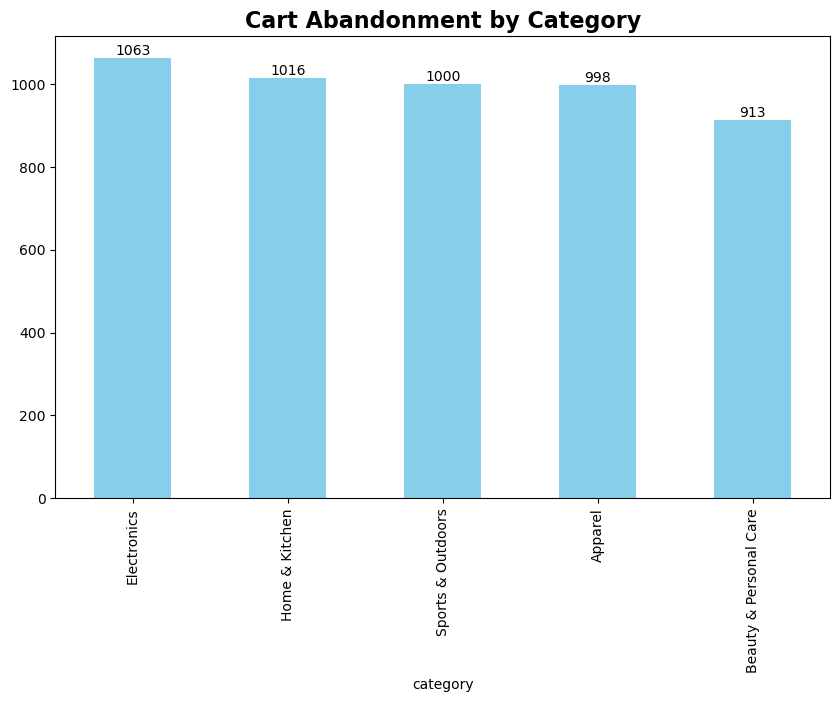

In [17]:
by_category = df['category'].value_counts()

plt.figure(figsize = (10,6))
by_category.plot(kind = 'bar', color = 'skyblue')
plt.title('Cart Abandonment by Category', fontsize=16, fontweight="bold")
for index, value in enumerate(by_category):
    plt.text(index, value,  
             str(value),         
             ha='center', va='bottom')
plt.show()

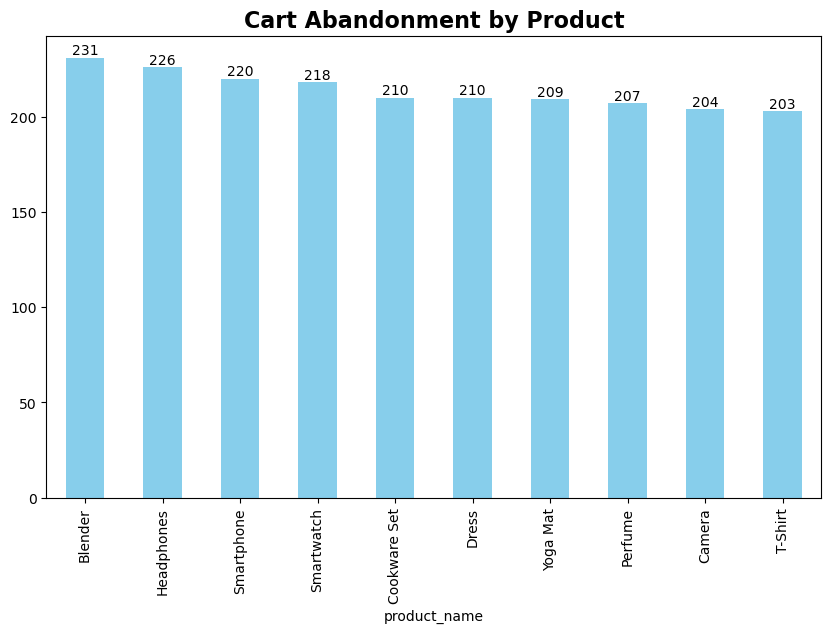

In [18]:
by_product = df['product_name'].value_counts().head(10)


plt.figure(figsize = (10,6))
by_product.plot(kind = 'bar', color = 'skyblue')
plt.title('Cart Abandonment by Product', fontsize=16, fontweight="bold")
for index, value in enumerate(by_product):
    plt.text(index, value,  
             str(value),         
             ha='center', va='bottom')
plt.show()

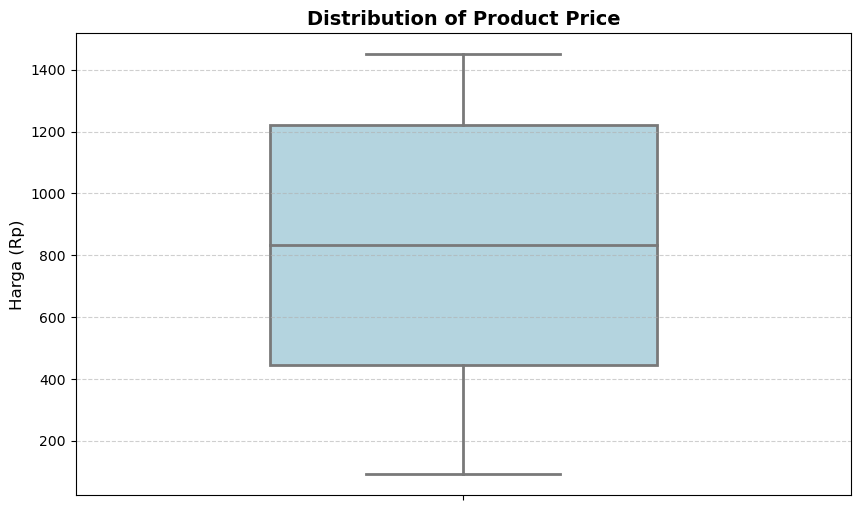

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'], color="lightblue", linewidth=2, width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})
plt.title("Distribution of Product Price", fontsize=14, fontweight="bold")
plt.ylabel("Harga (Rp)", fontsize=12)
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


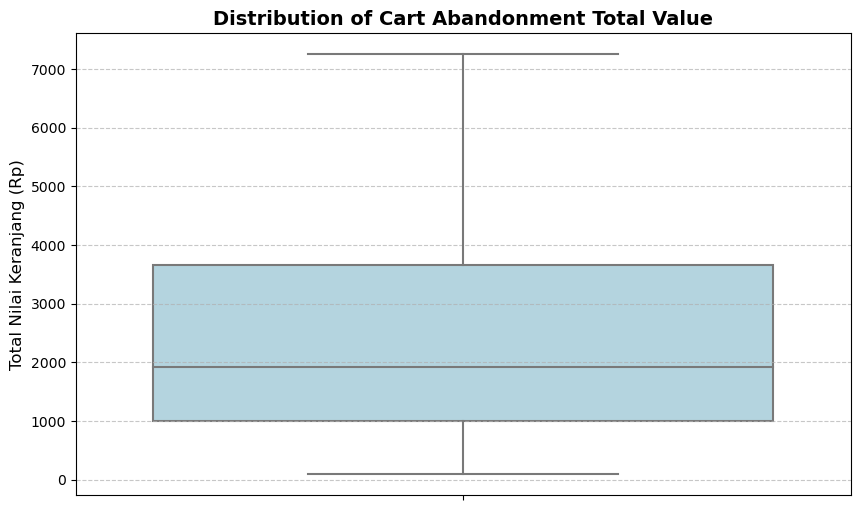

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'] * df['quantity'], color="lightblue")
plt.title("Distribution of Cart Abandonment Total Value", fontsize=14, fontweight="bold")
plt.ylabel("Total Nilai Keranjang (Rp)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

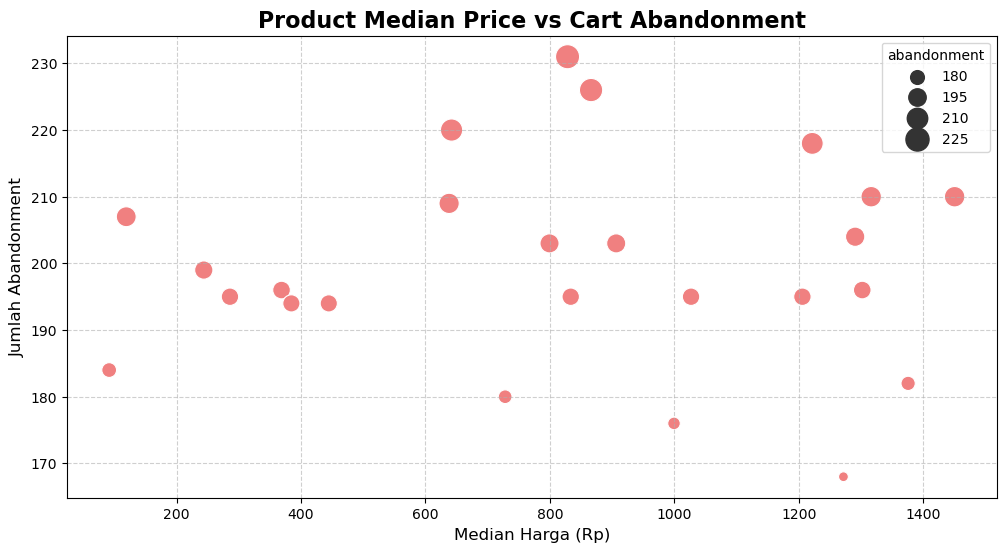

In [21]:
abandonment_counts = df['product_name'].value_counts()
median_price_by_product = df.groupby('product_name')['price'].median()

abandonment_vs_price = pd.DataFrame({
    'abandonment': abandonment_counts,
    'median_price': median_price_by_product
}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='median_price', 
    y='abandonment', 
    size='abandonment', 
    sizes=(50, 300), 
    data=abandonment_vs_price, 
    color="lightcoral"
)
plt.title("Product Median Price vs Cart Abandonment", fontsize=16, fontweight="bold")
plt.xlabel("Median Harga (Rp)", fontsize=12)
plt.ylabel("Jumlah Abandonment", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()


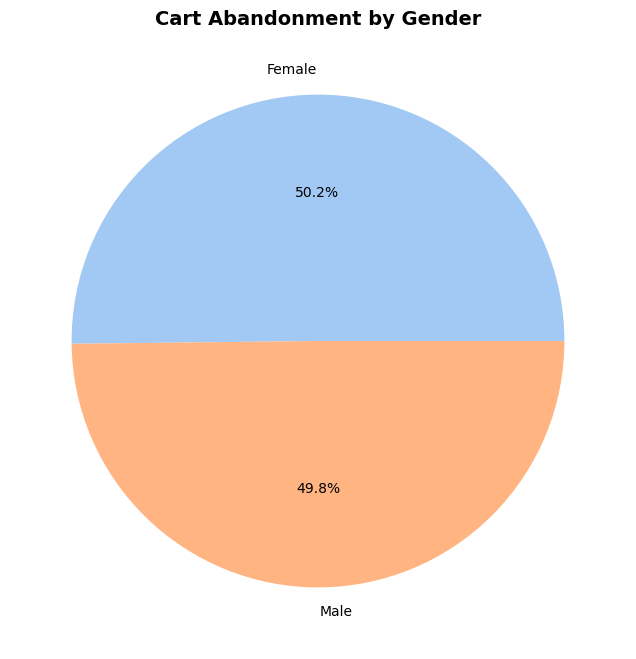

In [22]:
# Pie Chart untuk gender
plt.figure(figsize=(8, 8))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Cart Abandonment by Gender", fontsize=14, fontweight="bold")
plt.show()

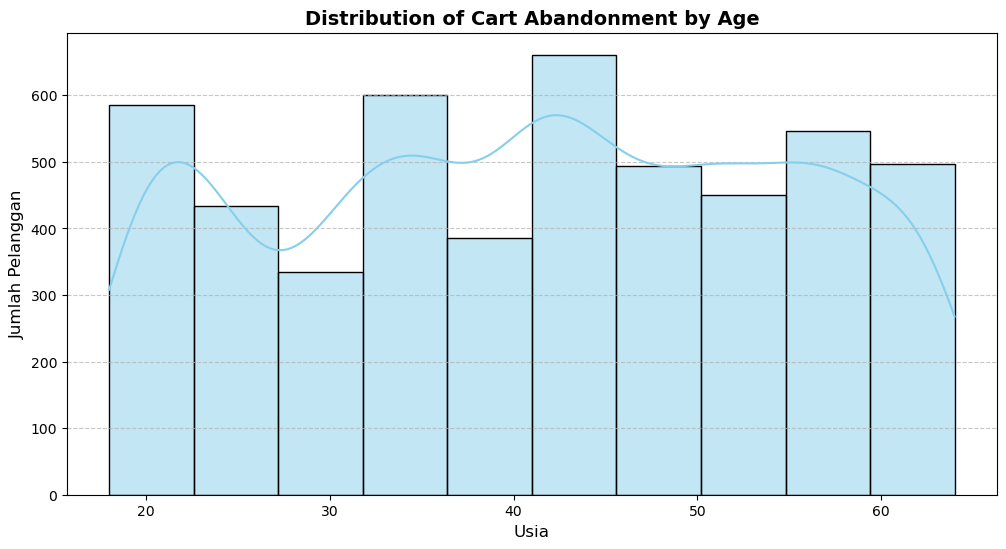

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Cart Abandonment by Age", fontsize=14, fontweight="bold")
plt.xlabel("Usia", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

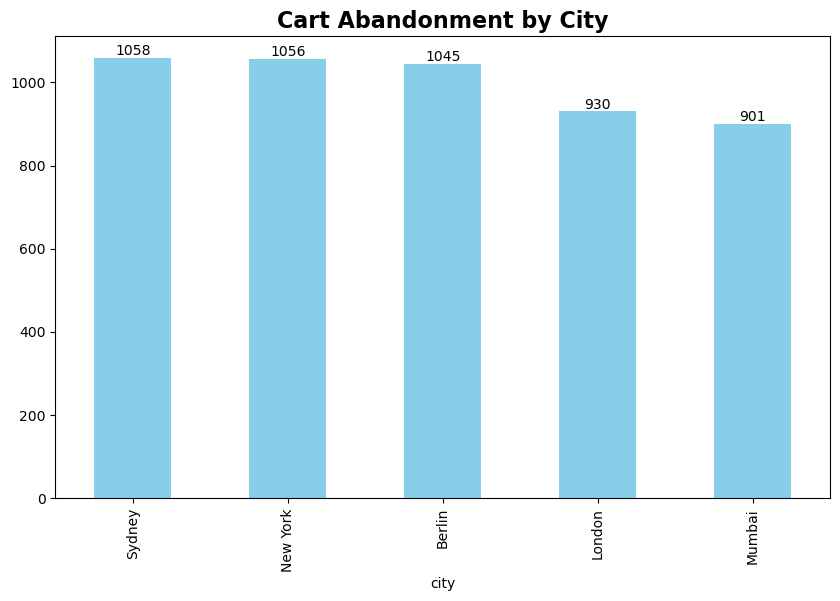

In [24]:
by_city = df['city'].value_counts()


plt.figure(figsize = (10,6))
by_city.plot(kind = 'bar', color = 'skyblue')
plt.title('Cart Abandonment by City', fontsize=16, fontweight="bold")
for index, value in enumerate(by_city):
    plt.text(index, value,  
             str(value),         
             ha='center', va='bottom')
plt.show()

<Figure size 1200x800 with 0 Axes>

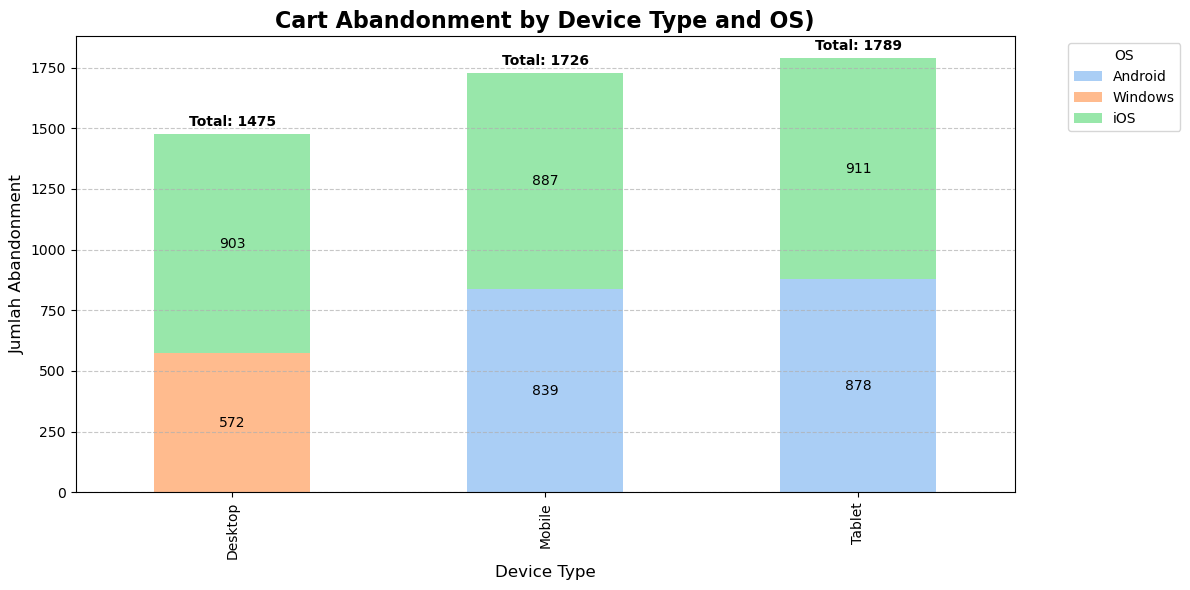

In [25]:
device_os_counts = df.groupby(['device_type', 'os']).size().unstack()
plt.figure(figsize=(12, 8))
ax = device_os_counts.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"), alpha=0.9, figsize=(12, 6))

for i, device in enumerate(device_os_counts.index):
    cumulative = 0
    total = device_os_counts.loc[device].sum()
    for os_type in device_os_counts.columns:
        count = device_os_counts.loc[device, os_type]
        if count > 0:
            plt.text(
                i, 
                cumulative + count / 2,  
                f"{int(count)}",  
                ha='center', 
                va='center', 
                fontsize=10
            )
            cumulative += count
    
    plt.text(
        i, 
        cumulative + 50, 
        f"Total: {int(total)}", 
        ha='center', 
        va='center', 
        fontsize=10, 
        fontweight='bold', 
        color='black'
    )

plt.legend(title="OS", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Cart Abandonment by Device Type and OS)", fontsize=16, fontweight="bold")
plt.xlabel("Device Type", fontsize=12)
plt.ylabel("Jumlah Abandonment", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()